In [700]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split



In [701]:
data=pd.read_csv(r"C:\Users\rocky\Desktop\diabetes_data_upload.csv")

In [702]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [703]:
cols=["Gender","Polyuria","Polydipsia","sudden weight loss","weakness","Polyphagia","Genital thrush","visual blurring","Itching","Irritability","delayed healing","partial paresis","muscle stiffness","Alopecia","Obesity","class"]

In [704]:
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

In [705]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [706]:
x=data.iloc[:,1:16].values
y=data.iloc[:,16].values

In [707]:
data.shape

(520, 17)

In [708]:
print(x)
print(y)

[[1 0 1 ... 1 1 1]
 [1 0 0 ... 0 1 0]
 [1 1 0 ... 1 1 0]
 ...
 [0 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

LOGISTIC REGRESSION

In [709]:
from sklearn.linear_model import LogisticRegression

In [710]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [711]:
len(x_train)

416

In [712]:
len(x_test)

104

In [713]:
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [714]:
y_pre=classifier.predict(x_test)

In [715]:
cm=confusion_matrix(y_test,y_pre)

In [716]:
print(cm)

[[37  5]
 [ 4 58]]


In [717]:
scoreLR=(accuracy_score(y_test,y_pre)*100)

In [718]:
scoreLR

91.34615384615384

NAIVE BAYES CLASSIFIER

In [720]:
from sklearn.naive_bayes import GaussianNB

In [721]:
classififer=GaussianNB

In [722]:
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [723]:
y_pre=classifier.predict(x_test)

In [724]:
confusionmatrix=confusion_matrix(y_test,y_pre)

In [725]:
print(confusionmatrix)

[[37  5]
 [ 4 58]]


In [726]:
scoreNVB=(accuracy_score(y_test,y_pre)*100)

In [727]:
scoreNVB

91.34615384615384

RANDOM FOREST

In [728]:
from sklearn.ensemble import RandomForestRegressor

In [729]:
rf=RandomForestRegressor(random_state=0)

In [730]:
model=rf.fit(x_train,y_train)

In [731]:
y_pre=model.predict(x_test)

In [732]:
scoreRF=(model2.score(x_train,y_train)*100)

In [733]:
scoreRF

95.67381278240539

DECISION TREE

In [734]:
from sklearn.tree import DecisionTreeRegressor

In [735]:
dt=DecisionTreeRegressor()

In [736]:
model=dt.fit(x_train,y_train)

In [737]:
y_pre=model.predict(x_test)

In [738]:
scoreDT=(model.score(x_train,y_train)*100)

In [739]:
scoreDT

97.95898341674027

XGBOOST

In [740]:
from xgboost import XGBRegressor

In [741]:
xgbr=XGBRegressor(verbosity=0)

In [742]:
mod=xgbr.fit(x_train,y_train)

In [743]:
y_pre=mod.predict(x_test)

In [744]:
scorexgb=(xgbr.score(x_train,y_train)*100)

In [745]:
scorexgb

97.95720530955778

HYPER PARAMETER TUNING

In [751]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(x_test)
print("Tuned Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuned Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        62

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



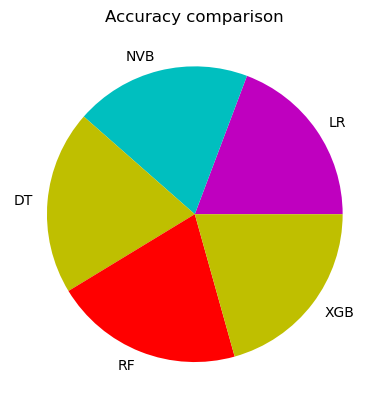

In [747]:
Accuracy = [scoreLR,scoreNVB,scoreRF,scoreDT,scorexgb]
color_code = ['m','c','y','r','y']
deviate_fraction = [0,0,0,0,0]
Algorithm = ['LR','NVB','DT','RF','XGB']
plt.pie(Accuracy,colors=color_code,labels=Algorithm,explode=deviate_fraction)
plt.title('Accuracy comparison')
plt.show()
